# <font color = "red">[READ THIS] Before you start</font>
Welcome to UpLevel mini-projects! In this series, you're challenged to independently work (with our guidance) with data that you will collect to UpLevel yourself. 

We hope you're excited to embark on this adventure.
### Warning:
This isn't just any coding course or programmes, where you receive helper code as you move from one code block to another. 

This is when things get <em>real</em>.

In this project, you will receive instructions to execute a task along with an intended outcome. Most importantly, we will provide you with directions you can go to, to pick up code independently and implement it in this notebook.

Don't worry though, we'll be dropping lots of resources you can consult and these readings will contain everything you need to succeed. You can also perform independent research to find answers independently. You just have to read closely and pick out the parts that make most sense. 

<strong>We make you do this not because we're lazy bastards but because being able to indepedently find code is a highly underrated skill and that's something all companies look out for.</strong>

If you're really stuck and are on the verge of giving up, we gotchu fam. Head on over to our Telegram community at https://bit.ly/UpLevelSG and post your questions there. 

### What we'll be doing:
In this project, we will do the following:

1. <font color='orange'>[Google Colab]</font> Explore Singapore's traffic camera API and map the locations of the cameras (Part I)
2. <font color='orange'>[Google Colab]</font> Make two one-month API calls to collect the initial data (Part II) 
3. <font color='orange'>[Google Colab]</font> Collecting massive amounts of image data from API (Part III) 
4. <font color='orange'>[Google Colab]</font> Prepare for GPU-enabled object detection (Part III) 
5. <font color='orange'>[Google Colab]</font> Using computer vision to count traffic in 2019 and 2020 (Part IV) 
6. <font color='orange'>[Google Colab]</font> Compare the traffic between two years (Part V)

### Expectations:
We're not going to sugarcoat it - it'll be challenging at times. You have to promise to put in the time and effort to UpLevel yourself. 

But we promise you that it'll ultimately be fun and rewarding, and you'll come out of it stronger and more confident than before.

# Introduction
<font color='green'>You're interested in seeing how traffic levels have changed between Jan 2019 - a normal year, and Jan 2020 - a COVID year in Singapore.

Your hypothesis is that the levels have dropped, and you're determined to find out through looking at the traffic cameras and computer vision.
</font>

In this Part, we will do the following:
1. Explore the traffic camera API from Singapore's Data.gov.sg
2. Map the locations of the traffic camera in Singapore
3. Identify the best camera to focus on for data collection

### Step 1: Install libraries
It gets a bit tricky installing these libraries because the environment is a little different in Google Colab. 

That said, we still recommend doing this in Google Colab just for standardization.

Additional reference: https://stackoverflow.com/questions/53697814/using-pip-install-to-install-cartopy-but-missing-proj-version-at-least-4-9-0

You'll have to install the following libraries using !pip install, in the following order:
- geopandas
- libproj-dev proj-data proj-bin <strong>(use apt-get install instead)</strong>
- libgeos-dev <strong>(use apt-get install instead)</strong>
- cython
- cartopy
- geoplot

You'll have to repeat this step every time you open the Colab notebook. 

In [ ]:
# Step 1: Install libraries

### Step 2: Import libraries
After installing the libraries, it's import to them. Go ahead and import the following libraries that we'll need:
- requests
- pandas as pd
- geopandas as gpd
- matplotlib.pyplot as plt
- geoplot as gplt

In [ ]:
# Step 2: Import libraries

# API Exploration
For the project, we will be collecting data from Data.gov.sg, a massive open government database.

Data.gov.sg is pretty cool, and one of the many APIs you can call is the traffic image API (<a href="https://data.gov.sg/dataset/traffic-images">link<a>).

Head on down there and take a look at how to call the API.

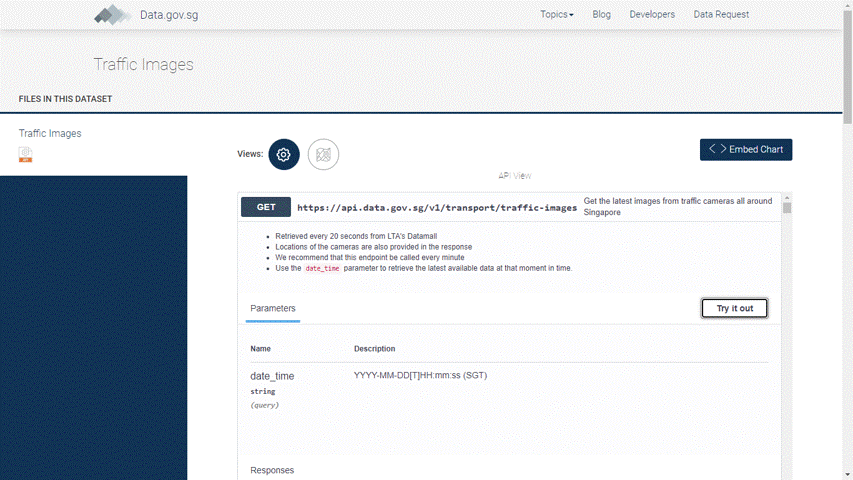

### Step 3: Call API
We'll be making an API call for the date of 2019-01-01, at 00:00:00. 

Head on the API page above and get the request URL. Call the API using requests and make sure your API response comes with a 200 response code.

In [ ]:
# Step 3a: Declare the request URL

# Step 3b: Make an API request and save the results in a variable

### Step 4: Check out the content of the API response
Once you get the response, make a .json method call and see what the output is. 

Ideally you should see something like this:

![APIResponseCall](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/APICallResponse.png)

There are three things to take note of:
1. Camera ID - we will be using one of the many cameras for our data collection
2. Image URL - the URL where we will retrieve our images from
3. GPS location - the location of the camera

In [ ]:
# Step 4: Take a look at the JSON from the response

### Step 5: Turn the appropriate JSON response into a DataFrame
Now that we know that the response contains our JSON, let's rearrange the JSON into a proper DataFrame. 

Expect something like this:
![JSONtoDataFrame](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/JSONToDataFrame.png)

You'll have to dig a bit before reaching the data you want, before turning the JSON into a proper DataFrame. You can use either from_dict or json_normalize.

The resulting DataFrame has:
1. 87 rows
2. 8 columns

In [ ]:
# Step 5: Get a DataFrame from the JSON

# Mapping the data

### Step 6: Download the SHP file for Singapore's map
Now that we have acquired a set of coordinates for the traffic cameras. We'll need to place them on the Singapore map.

To do this, we can use another Data.gov.sg's dataset, over <a href='https://data.gov.sg/dataset/master-plan-2014-planning-area-boundary-no-sea'>here</a>. 


After you unzip the file, upload the entire folder into your Google Drive folder containing the project.

This is how your Google Drive folder should look like.

```
Google Drive folder (give it a name)
│   Project CV x Traffic (Part I).ipynb
│   Project CV x Traffic (Part II).ipynb
│   Project CV x Traffic (Part III).ipynb
│   Project CV x Traffic (Part IV).ipynb    
│   Project CV x Traffic (Part V).ipynb    
│
└───master-plan-2014-planning-area-boundary-no-sea-shp
    │
    │   MP14_PLNG_AREA_NO_SEA_PL.dbf
    │   MP14_PLNG_AREA_NO_SEA_PL.prj
    │   MP14_PLNG_AREA_NO_SEA_PL.sbn
    │   MP14_PLNG_AREA_NO_SEA_PL.sbx
    │   MP14_PLNG_AREA_NO_SEA_PL.shp
    │   MP14_PLNG_AREA_NO_SEA_PL.shp.xml    
    │   MP14_PLNG_AREA_NO_SEA_PL.shx
```
Make sure that you have all seven files in the folder. This is because you won't be able to read your map otherwise.

### Optional: Mount your Google Drive
Don't forget to mount your Google Drive if you're working this from a Colab notebook.

### Step 7: Read the SHP file into a GeoDataFrame
Just like how you read a CSV with pandas, use the GeoPandas library to read_file with the .shp file.

If all goes well, this is what you'll see:

![SingaporeSHPGeoDataFrame](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/SingaporeSHPGeoDataFrame.png)

Expect:
1. 55 rows
2. 13 columns


In [ ]:
# Step 7: Read the SHP file that you uploaded 

### Step 8: Convert the Singaporean map's coordinate system
Currently, the x and y coordinates of the Singapore polygons are not in your usual longitude and latitude. 

Instead, they are currently in SYV21 format and will require some conversion.

Use the .to_crs method of the GeoDataFrame, with "EPSG:4326" as the argument. EPSG:4326 is the standard coordinate system used in GPS.

![SingaporeSHPGeoDataFrameEdited](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/SingaporeSHPGeoDataFrameEdited.png)

You'll end up with coordinates in 'geometry' that looks more similar to the coordinates you have in the DataFrame found in Step 7.

In [ ]:
# Step 8: Replace the coordinates in 'geometry'

### Step 9: Turn the DataFrame from Step 5 into GeoDataFrame
We'll need to plot the camera locations on the map we got from Step 8, so let's convert the DataFrame from Step 5 into a GeoDataFrame.

![CameraGeoDataFrame](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/CameraGeoDataFrame.png)

You'll also need to create a new colume named 'geometry' when loading your DataFrame into a GeoDataFrame.

<details>
  <summary>Click here once if you're unsure and need a hint</summary>
  <div><strong>Check out the official documentation at <a href='https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html'>here</a></strong></div>
</details>

In [ ]:
# Step 9: Get a GeoDataFrame from the DataFrame from Step 5

### Step 10: Plot the camera coordinates over the Singapore map
Now that we have prepared both datasets as DataFrames, it's time to plot them over each other so you can see where they are.

You can find out how to do this with geoplot's documentation (<a href="https://residentmario.github.io/geoplot/quickstart/quickstart.html">here</a>).

In [ ]:
# Step 10: Plot camera coordinats over the Singapore map

### Step 11: Label the points with camera ID
However, the points alone do not say anything. You'll have to figure out how to label each scatter point with the camera's ID.

A random note - in a POINT object, you can use .x and .y to retrieve the coordinates inside.

<details>
  <summary>Click here once if you're unsure and need a hint</summary>
  <div><strong>Google "geopandas add labels to points on plot"</strong></div>
</details>

In [ ]:
# Step 11: Plot the map with the camera and add labels on the camera locations

### Step 12: Download and view images
Now that we know where the cameras are located, let's check out a few of the images captured by these cameras. 

![SingaporeCameraLocations](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/SingaporeCameraLocations.png)

We'll focus on the city centers, but feel free to try other cameras too.

You can do it the good old fashioned way by retrieving the URLs of the images that correspond to each camera, and downloading the image directly from the URL for viewing.


In [ ]:
# Step 12: Download camera pictures and examine them

# End of Part I
In this Part, we explored the traffic image API and mapped the camera images out using geospatial libraries. 

In the next Part, we will collect the data necessary for our analyses. More specifically, we'll focus on camera ID 1709 because it's located near the downtown.

This makes it perfect for examining the effects of COVID-19 in the vicinity.